In [6]:
from Ridge_regression import ridgeReg
# import csv
# import numpy as np
# import pandas as pd
# from numpy import genfromtxt
# import math


In [4]:
df = pd.read_csv('valLabels.csv',header=None)

In [2]:
X = genfromtxt('trainData.csv', delimiter=',')
X=X[:,1:]

In [3]:
Y = genfromtxt('trainLabels.csv', delimiter=',')
Y=Y[:,1:]

In [4]:
print(X.shape)
print(Y.shape)

(5000, 3000)
(5000, 1)


In [4]:
X=X.T

In [8]:
print(X.shape)
print(Y.shape)

(5000, 3000)
(5000, 1)


In [9]:
def ridgeReg(X,Y,_lambda):
    n=X.shape[1]
    d=X.shape[0]
    Xbar=np.vstack((X,np.ones(n)))
    Ibar=np.identity(d+1)
    Ibar[d][d]=0
    Xbar=np.asmatrix(Xbar)
    Ibar=np.asmatrix(Ibar)
    Y=np.asmatrix(Y)
    C = Xbar * Xbar.T + _lambda * Ibar
    D=Xbar * Y
    C_inv = np.linalg.inv(C)
    wbar= C_inv*D    
    cvErrs=[0]*n
    for i in range(0,n):
        xi=Xbar[:,i]
        yi=Y[i]
        cvErrs[i]=(wbar.T*xi - yi) / (1 - xi.T * C_inv * xi )   
    cvErrs = np.square(cvErrs)
    obj=_lambda*wbar[0:d].T*wbar[0:d]+(wbar.T*Xbar-Y.T)*(wbar.T*Xbar-Y.T).T
    b=wbar[d]
    wbar=wbar[:d]
    
    
    return wbar,b, obj, cvErrs

In [11]:
wbar,b, obj, cvErrs=ridgeReg(X,Y,10)

In [13]:
cvErrs

matrix([[ 1.81848999, -3.02176539,  0.82128007, ..., -0.2944661 ,
         -2.36997903,  2.02304881]])

In [12]:
np.sqrt(np.sum(np.square(cvErrs))/5000)

2.3201351657981655

In [22]:
n=5000
err/n

4.0379860013851765

In [7]:
wbar

matrix([[ 0.05303123],
        [ 1.82171461],
        [ 0.77341697],
        ...,
        [-0.46487604],
        [-0.43919357],
        [ 0.30576636]])

In [23]:
from sklearn.linear_model import Ridge

In [29]:
clf = Ridge(alpha=1000)

In [28]:
Y.shape

(5000, 1)

In [30]:
clf.fit(X.T, Y)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
a=clf.get_params(True)

In [36]:
clf.coef_


array([[ 0.00088151,  0.0086839 ,  0.0005352 , ..., -0.00177685,
        -0.00248681,  0.00262677]])

In [5]:
from Ridge_regression import ridgeReg
import csv
import numpy as np
import pandas as pd
from numpy import genfromtxt
import math

X = genfromtxt('trainData.csv', delimiter=',')
X=X[:,1:]
X=X.T
Y = genfromtxt('trainLabels.csv', delimiter=',')
Y=Y[:,1:]
n=X.shape[1]
d=X.shape[0]
Xbar=np.vstack((X,np.ones(n)))


X_val = genfromtxt('valData.csv', delimiter=',')
X_val=X_val[:,1:]
Y_val = genfromtxt('valLabels.csv', delimiter=',')
Y_val=Y_val[:,1:]
X_val=X_val.T
n_val=X_val.shape[1]
Xbar_val=np.vstack((X_val,np.ones(n_val)))

X=np.asmatrix(X)
X_val=np.asmatrix(X_val)
Y=np.asmatrix(Y)
Y_val=np.asmatrix(Y_val)


_lambda=[0.01,0.1,1,10,100,1000]
rmse_train=[0]*len(_lambda)
rmse_validation=[0]*len(_lambda)
rmse_loocv=[0]*len(_lambda)
for i in range(0,len(_lambda)):
    wbar,b, obj, cvErrs=ridgeReg(X,Y,_lambda[i])
    rmse_loocv[i]= math.sqrt(np.sum(np.square(cvErrs))/n)
    w=np.vstack((wbar,b))
    w=np.asmatrix(w)
    rmse_train[i]=math.sqrt(((w.T*Xbar-Y.T)*(w.T*Xbar-Y.T).T)/n)
    rmse_validation[i]=math.sqrt(((w.T*Xbar_val-Y_val.T)*(w.T*Xbar_val-Y_val.T).T)/n_val)


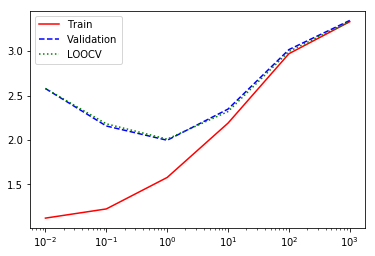

In [38]:
import matplotlib.pyplot as plt
import math


plt.plot(_lambda,rmse_train, color='red', label='Train',linestyle='-')
plt.plot(_lambda,rmse_validation, color='blue', label='Validation',linestyle='--')
plt.plot(_lambda,rmse_loocv, color='green', label='LOOCV',linestyle=':')
plt.legend(loc='best')
plt.xscale('log')
plt.show()

                 


In [11]:
plt.show()

In [34]:
rmse_train

[1.1205188247625633,
 1.223811965696345,
 1.5780360753175766,
 2.189953395751712,
 2.970941965610809,
 3.331612592153037]

In [35]:
rmse_validation

[2.5791868257094386,
 2.1574812686463667,
 1.9967715113680997,
 2.3477055139163974,
 3.0171052386646764,
 3.3454150908475513]

In [39]:
_lambda

[0.01, 0.1, 1, 10, 100, 1000]

In [40]:
_lambda=1
from Ridge_regression import ridgeReg
import csv
import numpy as np
import pandas as pd
from numpy import genfromtxt
import math

X = genfromtxt('trainData.csv', delimiter=',')
X=X[:,1:]
X=X.T
Y = genfromtxt('trainLabels.csv', delimiter=',')
Y=Y[:,1:]
n=X.shape[1]
d=X.shape[0]
Xbar=np.vstack((X,np.ones(n)))

X=np.asmatrix(X)
Y=np.asmatrix(Y)

wbar,b, obj, cvErrs=ridgeReg(X,Y,_lambda)
w=np.vstack((wbar,b))
w=np.asmatrix(w)
Sum_square=((w.T*Xbar-Y.T)*(w.T*Xbar-Y.T).T)
reg_term=_lambda*wbar.T*wbar


In [70]:
obj


matrix([[17200.94056872]])

In [71]:
reg_term

matrix([[4749.9512937]])

In [73]:
rmse_train

matrix([[12450.98927502]])

In [74]:
cvErrs

array([[[9.89433589e-01]],

       [[5.88411339e+00]],

       [[1.83829453e-03]],

       ...,

       [[2.50417131e+00]],

       [[5.21818792e+00]],

       [[1.29193006e-01]]])

In [75]:
w

matrix([[ 5.30312251e-02],
        [ 1.82171461e+00],
        [ 7.73416967e-01],
        ...,
        [-4.39193568e-01],
        [ 3.05766363e-01],
        [ 8.42394142e+01]])

In [76]:
b

matrix([[84.23941417]])

In [78]:
cvErrs.shape

(5000, 1, 1)

In [42]:
header

,0
0,flavors raspberries cherries
1,cherry cocoa
2,age years
3,different
4,marmalade
5,ready
6,darker
7,long spicy
8,grass
9,wine finishes


In [41]:
header = pd.read_csv('feature.csv', header = None)

In [7]:
_lambda=1
from Ridge_regression import ridgeReg
import csv
import numpy as np
import pandas as pd
from numpy import genfromtxt
import math
from sklearn.preprocessing import normalize

X = genfromtxt('trainData.csv', delimiter=',')
X=X[:,1:]
X=normalize(X,axis=0)
X=X.T
Y = genfromtxt('trainLabels.csv', delimiter=',')
Y=Y[:,1:]
n=X.shape[1]
d=X.shape[0]
Xbar=np.vstack((X,np.ones(n)))

X=np.asmatrix(X)
Y=np.asmatrix(Y)


wbar,b, obj, cvErrs=ridgeReg(X,Y,_lambda)
w=np.vstack((wbar,b))

# w=np.asmatrix(w)
# rmse_train=((w.T*Xbar-Y.T)*(w.T*Xbar-Y.T).T)
# reg_term=_lambda*wbar.T*wbar

KeyboardInterrupt: 

In [63]:
wbar=np.abs(wbar)
df=pd.DataFrame(wbar)

In [64]:
df1=pd.concat([header,df],axis=1)
df1.columns = ['a', 'b']

In [65]:
df1.sort_values(by=['b'],ascending=False)

,a,b
2368,flavors nice,11.182770
773,red,9.259408
2176,tough,8.889018
642,little heavy,8.551352
2975,stuff,8.114578
184,infused,7.946991
2835,currant cola,7.495836
207,currants chocolate,6.897862
1587,currants dark chocolate,6.655965
1295,savory,6.483985


In [11]:
cvErrs

array([[[9.89433589e-01]],

       [[5.88411339e+00]],

       [[1.83829453e-03]],

       ...,

       [[2.50417131e+00]],

       [[5.21818792e+00]],

       [[1.29193006e-01]]])

In [4]:


X = genfromtxt('trainData.csv', delimiter=',')
X=X[:,1:]
Y = genfromtxt('trainLabels.csv', delimiter=',')
Y=Y[:,1:]
n=X.shape[0]

X_val = genfromtxt('valData.csv', delimiter=',')
X_val=X_val[:,1:]
Y_val = genfromtxt('valLabels.csv', delimiter=',')
Y_val=Y_val[:,1:]







In [17]:
Xbar=np.vstack((X,X_val))
Ybar=np.vstack((Y,Y_val))


Xbar=Xbar.T
add=np.sum(Xbar,axis=0)
sqr=np.multiply(Xbar,Xbar)
square=np.sum(sqr,axis=0)
Xbar=np.vstack((Xbar,add))
Xbar=np.vstack((Xbar,square))
Xbar=np.asmatrix(Xbar)


# X_train=Xbar[0:8000,:]
# Y_train=Ybar[0:8000,:]
# X_test=Xbar[8000:,:]
# Y_test=Ybar[8000:,:]


# X_test=X_test.T
# n=X_test.shape[1]
# X_test=np.vstack((X_test,np.ones(n)))


_lambda=[1.15]
rmse_validation=[0]*len(_lambda)

for i in range(0,len(_lambda)):
    wbar,b, obj, cvErrs=ridgeReg(Xbar,Ybar,_lambda[i])
    w=np.vstack((wbar,b))
    print(cvErrs.shape)
    rmse_validation[i]=math.sqrt(np.sum(np.square(cvErrs)) / 10000)

(1, 10000)


In [18]:
T = genfromtxt('testData.csv', delimiter=',')
id=T[:,0]
id=np.reshape(id,(5000,1))
id=id.astype(int)
T=T[:,1:]
T=T.T
add=np.sum(T,axis=0)
sqr=np.multiply(T,T)
square=np.sum(sqr,axis=0)
T=np.vstack((T,add))
T=np.vstack((T,square))
T=np.asmatrix(T)
n=T.shape[1]
T=np.vstack((T,np.ones(n)))
Ypred=w.T*T
Submission=np.hstack((id,Ypred.T))


In [ ]:
np.savetxt("submission.csv", Submission, header="Id,Prediction",delimiter=",")

In [ ]:
df3 = pd.DataFrame(Submission,columns=['Id', 'Prediction'])
df3[['Id']] = df3[['Id']].astype(int)

In [16]:
df3.to_csv("submission.csv",index=False)

In [36]:
df3.head()

,Id,Prediction
0,0,90.336890
1,1,88.451247
2,2,89.795789
3,3,84.726711
4,4,93.452000


In [16]:
X_train.shape

(10000, 3001)

In [31]:
Xbar.shape

(3002, 10000)

In [48]:
Y_train.shape

(10000, 1)

In [46]:
df = pd.read_csv('trainData.csv',header=None)

In [41]:
cvErrs.shape


(1, 5000)

In [49]:
df=df.iloc[:,1:]

In [13]:
rmse_validation

[1.8694781709349055]

In [86]:
np.ones(n).shape

(2000,)

In [12]:
rmse_validation

[1.895573053323684]

In [28]:
w.shape

(3001, 1)

In [21]:
Xnew=np.square(Xbar)

In [22]:
Xnew.shape

(10000, 3000)

In [19]:
p=np.sum(Xbar, axis=0)

In [44]:
Xbar=np.vstack((Xbar,p))

In [45]:
Xbar.shape

(10001, 3000)

In [23]:
Xbar[:,2646]

array([1.      , 0.997776, 0.998118, ..., 1.004004, 1.00352 , 0.998816])

In [24]:
p.shape

(10000,)

In [33]:
a=np.vstack((Xbar.T,p))

In [34]:
a.shape

(3001, 10000)

In [28]:
p.shape

(10000,)